# PORTUGUES BANK 


### BINARY CLASSIFICATION : To predict whether a customer will or will not buy a product (yes/no) 
(based on this provide marketing suggestions)

In [1]:
#Imports 

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt 


import warnings
warnings.filterwarnings('ignore')

In [2]:
#read/import csv file

d=pd.read_csv('bank.csv',sep=";")
d

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### BASIC CHECKS

In [3]:
d.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
d.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
d.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# EXPLORATORY DATA ANALYSIS

In [7]:
#rename the TARGET VARIABLE 
import pandas as pd #panelled data

# Rename the column
d.rename(columns={'y': 'subscription'}, inplace=True)

# Display the DataFrame after renaming
print("After renaming:")
print(d)   #done

After renaming:
       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week 

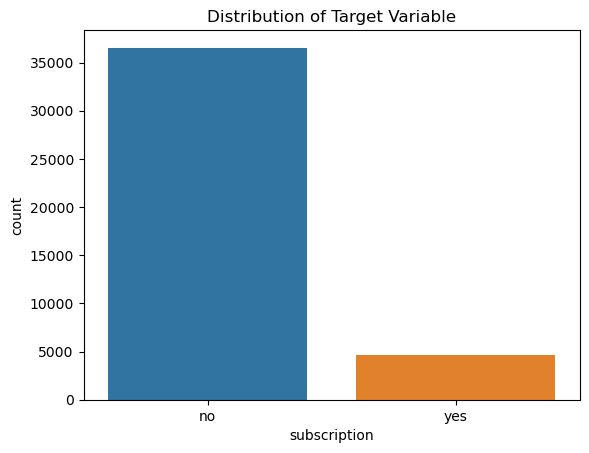

In [8]:
# Check the distribution of the TARGET variable
sns.countplot(x='subscription', data=d)
plt.title('Distribution of Target Variable')
plt.show()

### UNIVARIATE ANALYSIS

In [9]:
#univariate analysis using sweetviz
!pip install sweetviz

In [10]:
import sweetviz as sv#importing sweetviz library 
my_report = sv.analyze(d)#syntax to use sweetviz
my_report.show_html()#Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


##### UNIVARIATE ANALYSIS REPORT 
- **Age** > the age of bank customers lie between 17 (min) to 98 (max), most clients are between the age 30 t0 50, and the median lies at 38, i.e. 

- **Jobs** > most of the customers work at admin roles(25%), followed by blue collar jobs and then technicians folllowed by the servive providers (about 10%).

- **Maritial status** > 60% for the customers are married, about 30% are not married and about 10% divorced.

- **Education/ Qualification** >about 30% of clients have a university degree, about 25% have a high school certification, and about 15% with a basic 9Y, followed by those with only professional course certifications.

- **Loan Defaulters** > about 80% of the customers have no defatlts, and more that 15% have defaultes wheres the status of a small group is yet unknown (these unknown columns will have to bo dropped to avoid errors in out output)

- **Contact** >it is observed taht more that 60% customers are contacted via cellular devices and the rest via the traditional telephone.

- **Last contacted Month** > most customers were last contacted in the month of may followed by july aug and june. this colums would not be significantly vital to our models calculations and will be dropped.

- **day of the week last contacted** > most customers were last contacted on thursday, followed by Mon, wed, tue, friday.this colums would not be significantly vital to our models calculations and will be dropped.

- **Duration of the last call** > the max duration for the last call would not be significantly vital to our models calculations and will be dropped.

- **Campaign** > the of max number of contacts performed during the last campaign is 56 and least 1. this colums would not be significantly vital to our models calculations and will be dropped.

- **PDAYS** > This denotes the number of days that passed by after the client was last contacted from a previous campaign 999 signifies that the client was not previously contacted, almost 90% of the clients were not previously contacted, wheres as a very small percentage were contacted.

- **previous**> it denotes the number of contacts performed before this campaign for a client, more than 85% were not contacted and about 10% were contacted atleast once

- **Employee Variation Rate** > it denoted  the variation of how many people are being hired or fired due to the shifts in the conditions of the economy, the highest in this case being 1.4

- **Consumer Price Index** >this index measure changes in the prices of goods and services purchased or acquired by households, in this data set the median index is at 93, the max being 94.77 and min being 93.20, these values only differed slightly by decimal points.

- **Consumer Confidance Index (CCI)** > this index measures and compares how consumers view the overall economy, it infers that when consumers are optimistic, they spend more, stimulating the economy, but when pessimistic, spending decline, this would help us gain insights on whether the customers would have the resources to purchase the term deposit of the portugues bank, in this data set the median CCI is -41, and max and min being 26.9 and 50.8.

- **euribor3m** > this is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months. this median being 4.86% and the max and min being 5.04% and 0.63%

- **nr.employed** > this indicator indicates the number of employees employed, in this dataset the median of employees employed is 5191, and the maximum and minimum employed at a time are; 5228 and 4964 respectively.

- **y or subscription** > this is the target variable, and informs whether the client subscribed towards the term deposit or not (this is a binary classification in the form YES / NO) in the given data set more that 80 % have not subscribed to the term deposit and just more than 10% have subscribed.

### BIVARIATE ANALYSIS

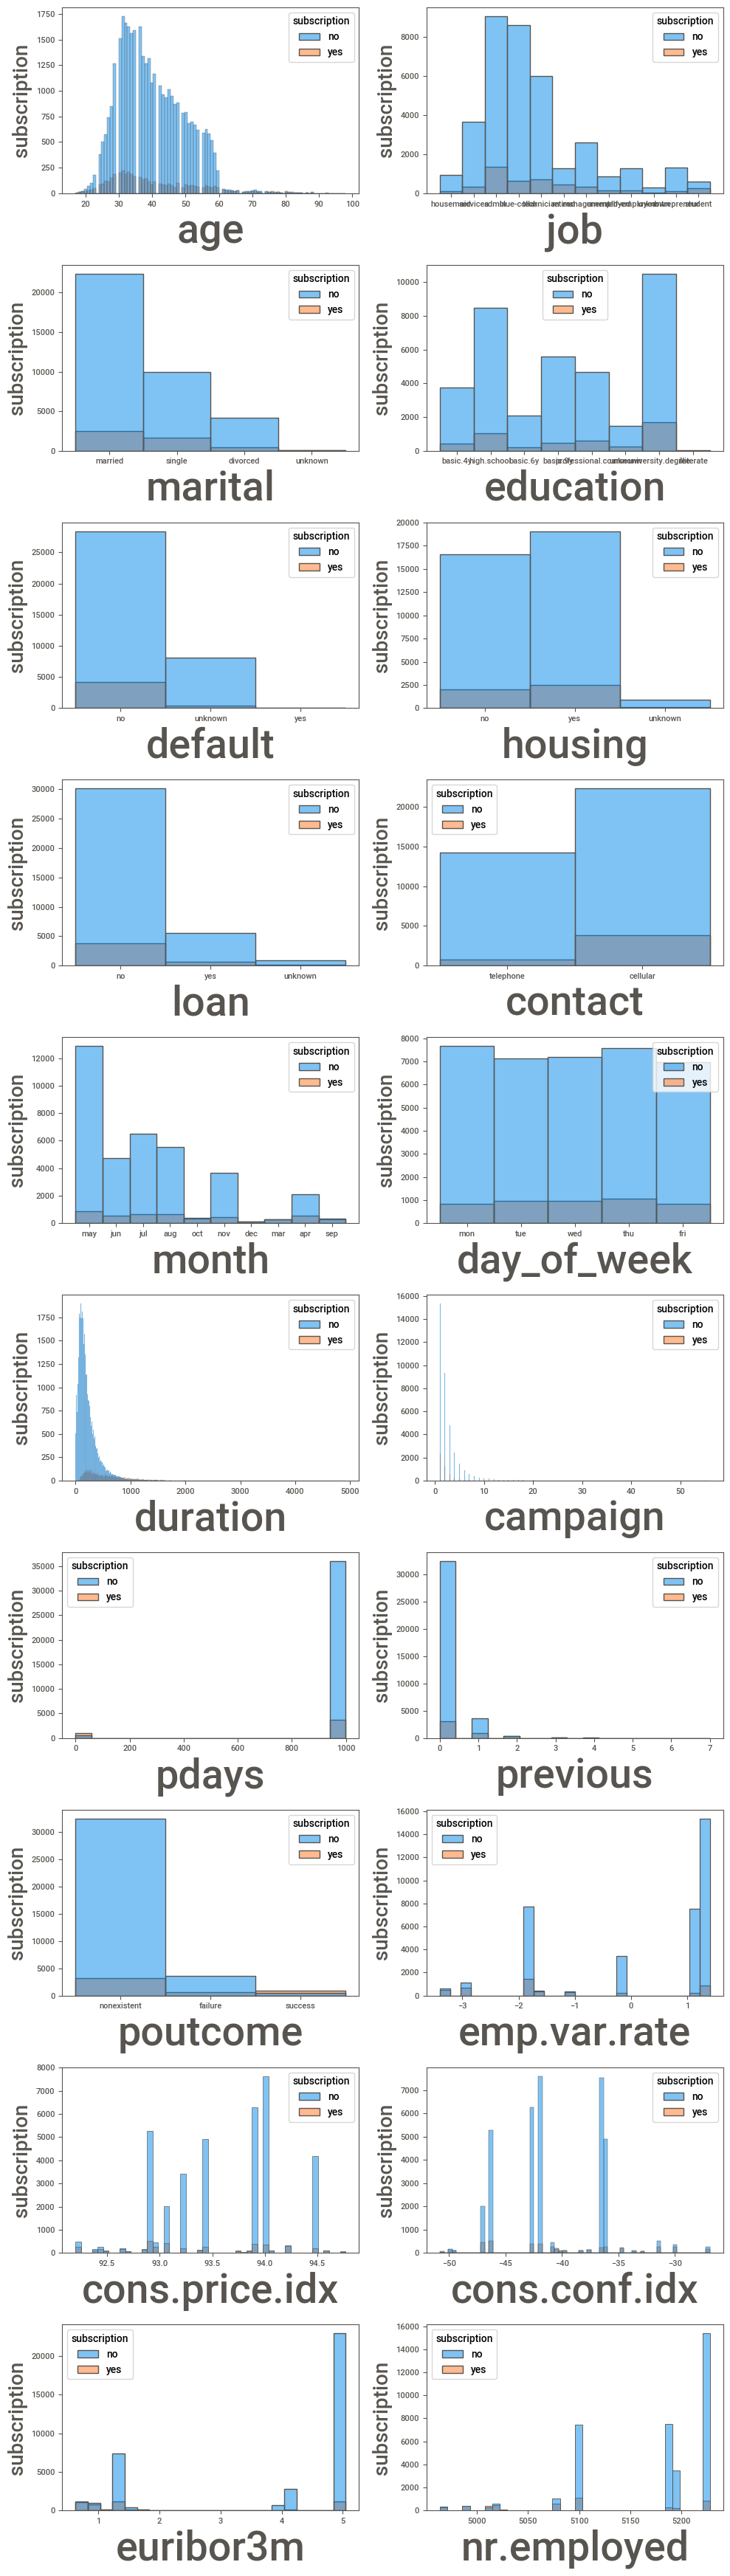

In [11]:
plt.figure(figsize=(10,35), facecolor='white') #To set canvas 
plotnumber = 1#counter

for column in d: #accessing the columns 
    if plotnumber<=20 :
        ax = plt.subplot(10,2,plotnumber)
        sns.histplot(x=d[column]
                        ,hue=d.subscription)
        plt.xlabel(column,fontsize=40)#assign name to x-axis and set font-20
        plt.ylabel('subscription',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

### MULTIVARIATE ANALYSIS

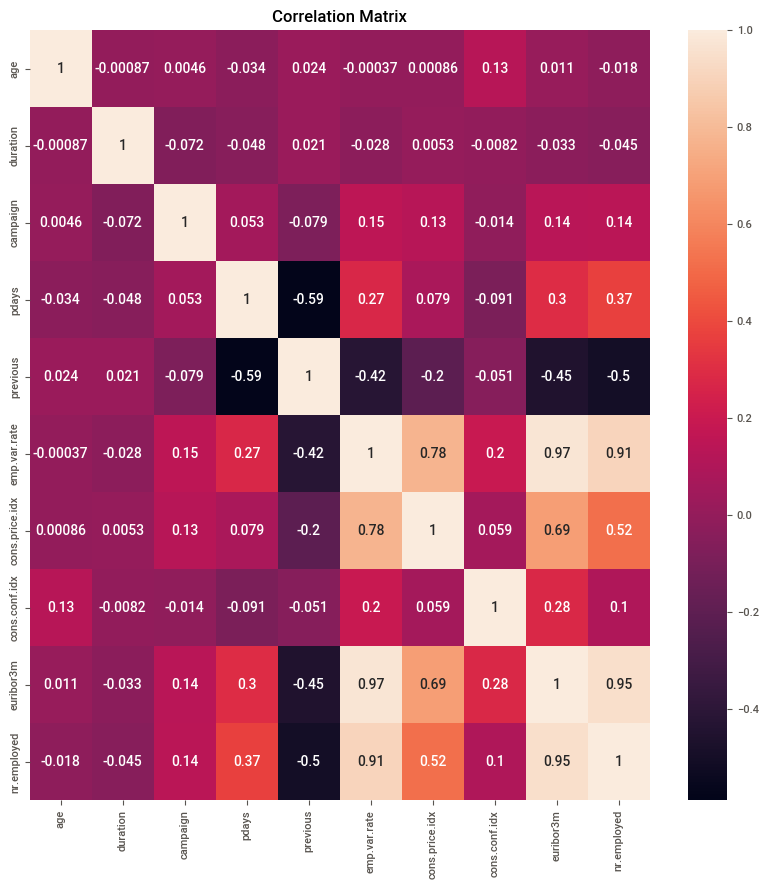

In [12]:
# Explore  correlation
#multi variate analysis
plt.figure(figsize=(10,10)) #To set canvas 
sns.heatmap(d.drop('subscription',axis=1).corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

## DATA PREPROCESSING & FEATURE ENGINEERING
* CATEGORICAL TO NUMERICAL
* OUTLIERS - BOX PLOT
* NULL VALUES 

In [13]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [14]:
d.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscription      0
dtype: int64

### Dropping columns due to relevance in the data set - duration, contact, month, day_of_week
### Dropping columns due to high correlation  in data set- previous, emp.var.rate, cons.price.idx, euribor3m, nr.employed 


###### Reasons as to why Duration, contact, month, day_of_week, poutcome  columns were dropped

- 'contact':whether the call was telephonic or cellular, would not assist us in knowing if a customer would purchase a term deposit.

- 'month': signifies the lst month a customer was called 

- 'day_of_week': last contacted day of a particular week, These variables may not provide significant predictive power or may introduce noise to the model. In such cases, it is in the best interests to remove them to simplify the model and improve interpretability.

- duration: duration of the last cal, By removing this column, one prevents the model from relying on a variable that would not be available in a real-time scenario, thus avoiding potential bias.

- 'poutcome': This column represents the outcome of the "previous marketing campaign".Removing it can help avoid relying on information that may not be relevant or reliable.


In [15]:
d= d.drop(['contact', 'month', 'day_of_week', 'duration','poutcome'], axis=1)


In [16]:
d

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscription
0,56,housemaid,married,basic.4y,no,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes


# categorical to numerical

In [17]:
#JOB 
#label encoding
print(d['job'].unique())   #['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired''management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur''student']
                           

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [18]:
print(d['marital'].unique())   #['married' 'single' 'divorced' 'unknown']
                               # replace unknown with mode - married is the dighest

['married' 'single' 'divorced' 'unknown']


In [19]:
print(d['education'].unique())   #['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course''unknown' 'university.degree' 'illiterate']
                                 #unknown replace with median

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [24]:
print(d['default'].unique())   #['no' 'unknown' 'yes']
                               #replace unknown with mode - NO

['no' 'unknown' 'yes']


In [25]:
print(d['housing'].unique())   #['no' 'yes' 'unknown']
                               #REPLACE WITH MODE -YES

['no' 'yes' 'unknown']


In [26]:
print(d['loan'].unique())    #['no' 'yes' 'unknown']
                            #REPLACE WITH MODE -YES

['no' 'yes' 'unknown']


### dropping unknown

In [27]:
# Get the number of rows before dropping NaN values
num_rows_before= len(d)
num_rows_before

41188

In [28]:
# Check for "unknown" values in each column
for column in d.columns:
    unknown_count = d[column].loc[d[column] == 'unknown'].count()
    if unknown_count > 0:
        print(f"Column '{column}' has {unknown_count} 'unknown' values.")

Column 'job' has 330 'unknown' values.
Column 'marital' has 80 'unknown' values.
Column 'education' has 1731 'unknown' values.
Column 'default' has 8597 'unknown' values.
Column 'housing' has 990 'unknown' values.
Column 'loan' has 990 'unknown' values.


In [29]:
# Replace "unknown" values with NaN
d.replace('unknown', pd.NA, inplace=True)

# Drop rows with NaN values
d.dropna(inplace=True)

# Now the dataset does not contain rows with "unknown" values

In [30]:
# Get the number of rows after dropping NaN values
num_rows_after = len(d)
num_rows_after

30488

In [31]:
# Print the results
print(f"Number of rows before dropping 'unknown' values: {num_rows_before}")
print(f"Number of rows after dropping 'unknown' values: {num_rows_after}")

#after gathering before and after results

Number of rows before dropping 'unknown' values: 41188
Number of rows after dropping 'unknown' values: 30488


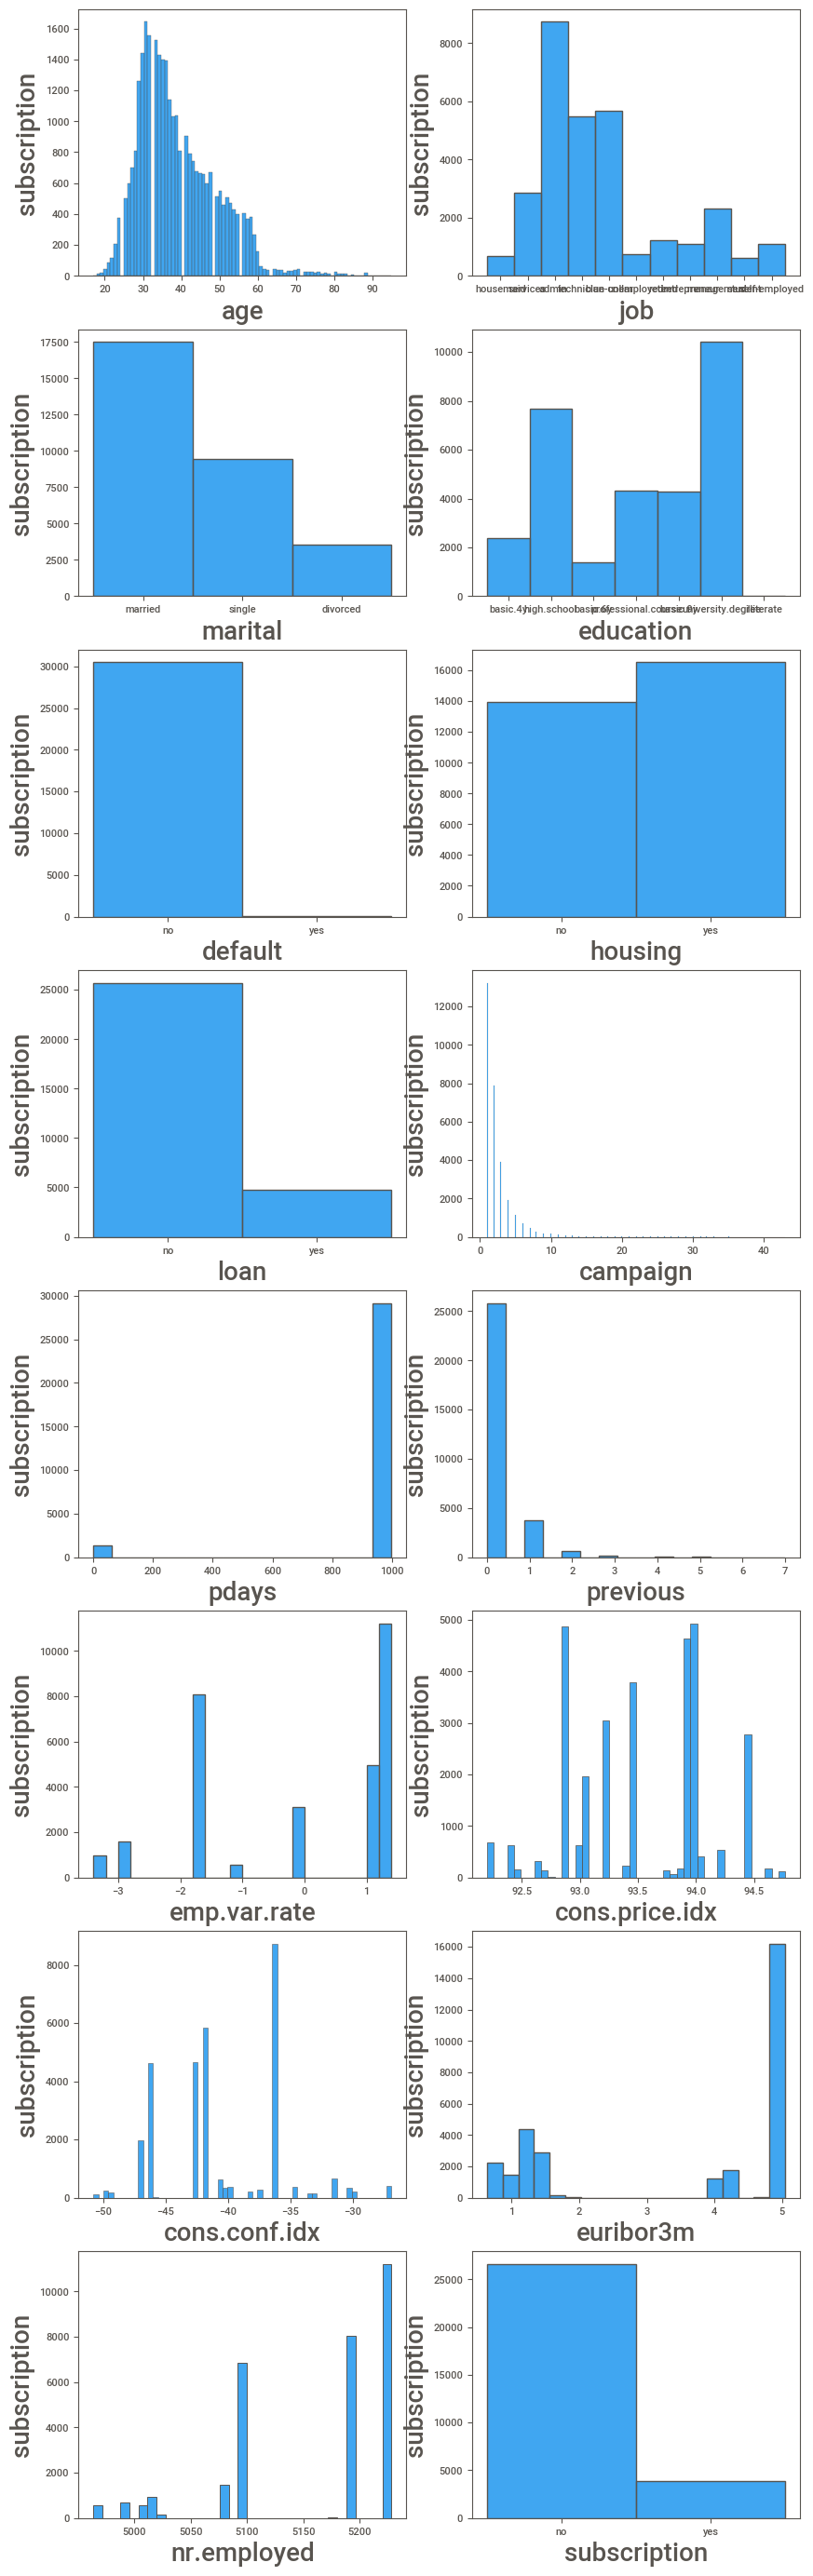

In [32]:
# let's see how data is distributed for every column
plt.figure(figsize=(10,35), facecolor='white')
plotnumber = 1

for column in d:
    if plotnumber<=16 :
        ax = plt.subplot(8,2,plotnumber)
        sns.histplot(d[column]) 
        plt.xlabel(column,fontsize=20)
        plt.ylabel('subscription',fontsize=20)
    plotnumber+=1
plt.show()

In [33]:
d

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscription
0,56,housemaid,married,basic.4y,no,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes


### CATEGORICAL TO NUMERICAL

In [34]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']

lc = LabelEncoder()
d[categorical_cols] = d[categorical_cols].apply(lc.fit_transform)

In [35]:
# Create dummy variables for the remaining categorical variables
d = pd.get_dummies(d, drop_first=True)

In [36]:
d #to ensure categorical were converted to numerical

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscription_yes
0,56,3,1,0,0,0,0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,1,0,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [37]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [38]:
# Convert categorical variables to numerical using label encoding
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']
label_encoder = LabelEncoder()
d[categorical_cols] = d[categorical_cols].apply(label_encoder.fit_transform)

In [39]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               30488 non-null  int64  
 1   job               30488 non-null  int64  
 2   marital           30488 non-null  int64  
 3   education         30488 non-null  int64  
 4   default           30488 non-null  int64  
 5   housing           30488 non-null  int64  
 6   loan              30488 non-null  int64  
 7   campaign          30488 non-null  int64  
 8   pdays             30488 non-null  int64  
 9   previous          30488 non-null  int64  
 10  emp.var.rate      30488 non-null  float64
 11  cons.price.idx    30488 non-null  float64
 12  cons.conf.idx     30488 non-null  float64
 13  euribor3m         30488 non-null  float64
 14  nr.employed       30488 non-null  float64
 15  subscription_yes  30488 non-null  uint8  
dtypes: float64(5), int64(10), uint8(1)
memor

### FINDING OUTLIERS - USING BOX PLOT

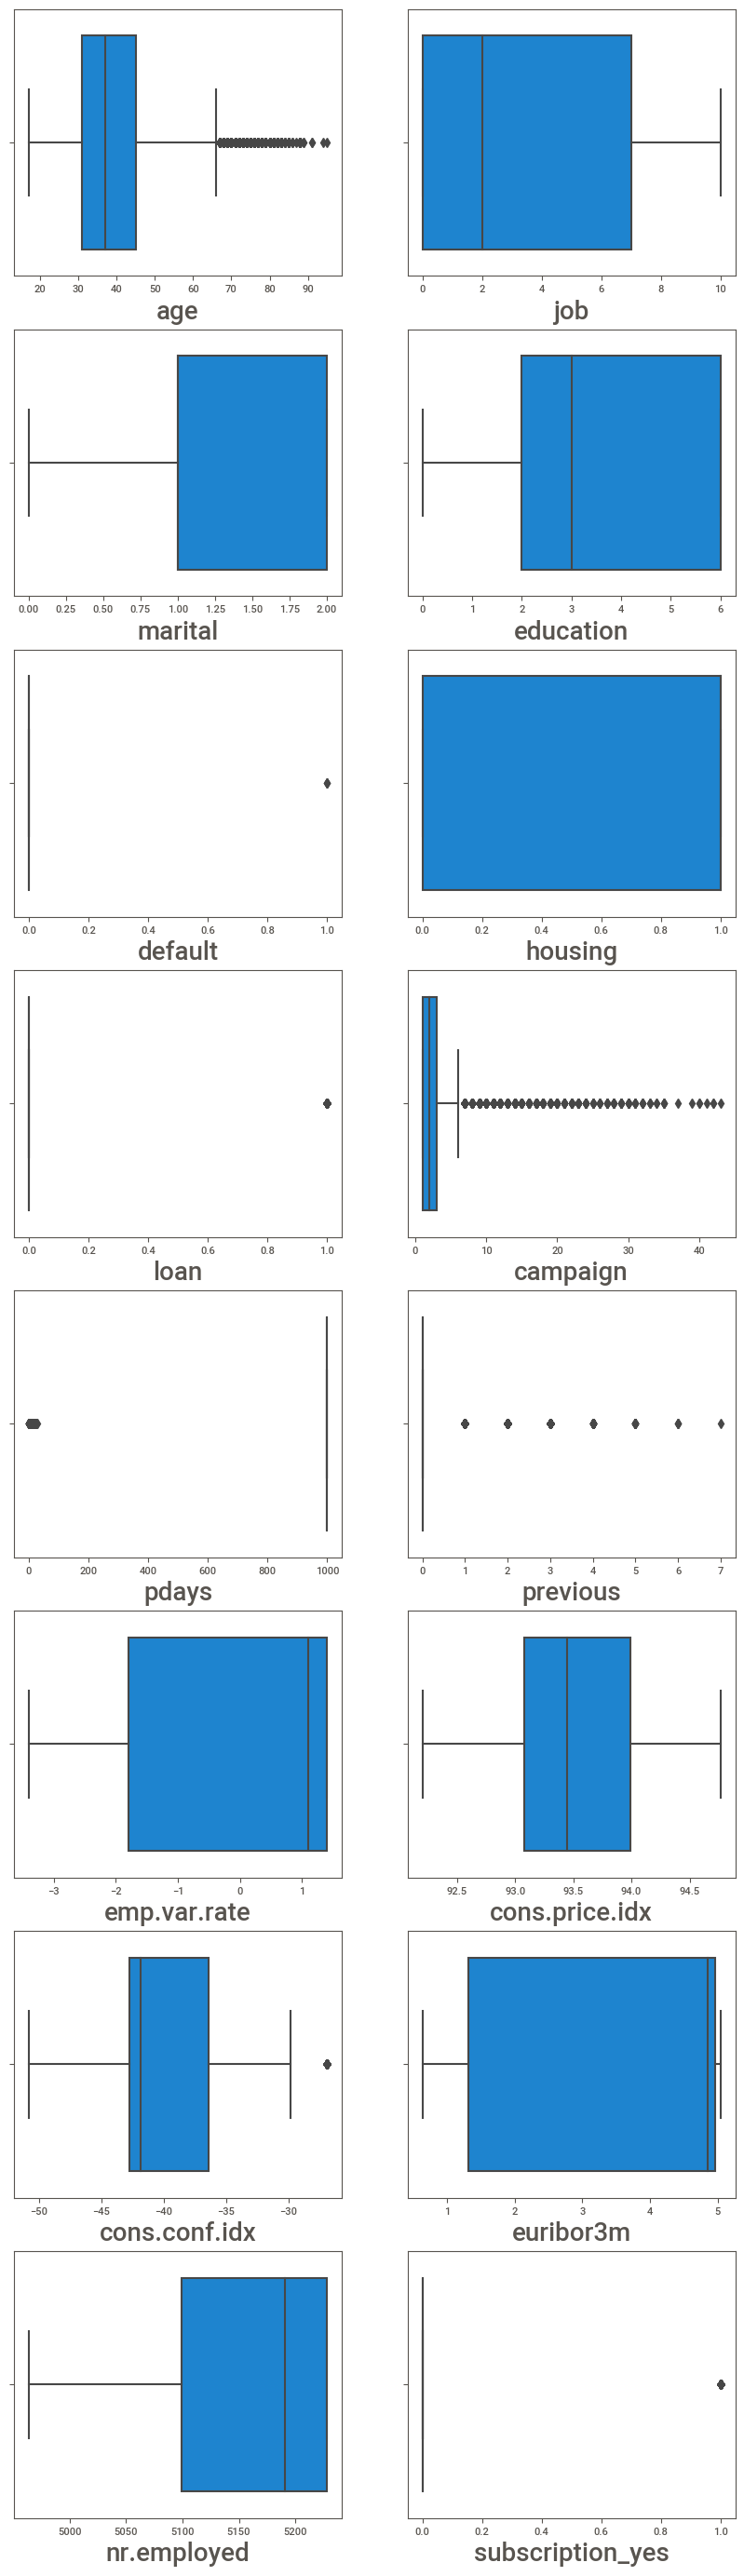

In [40]:
# Checking for outliers
# let's see how data is distributed for every column
plt.figure(figsize=(10,35), facecolor='white')
plotnumber = 1

for column in d:
    if plotnumber<=16 :
        ax = plt.subplot(8,2,plotnumber)
        sns.boxplot(d[column]) 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [41]:
numerical_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [42]:
def calculate_outlier_percentage(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    outlier_threshold = 1.5 * IQR

    num_outliers = ((column < Q1 - outlier_threshold) | (column > Q3 + outlier_threshold)).sum()
    percentage_outliers = (num_outliers / len(column)) * 100
    return percentage_outliers


In [43]:
# Calculate the percentage of outliers for each numerical column
outlier_percentages = {column: calculate_outlier_percentage(d[column]) for column in numerical_cols}
print("Percentage of outliers in each numerical feature:")
print(outlier_percentages)

Percentage of outliers in each numerical feature:
{'age': 1.5022303857255315, 'campaign': 5.4939648386250335, 'pdays': 4.296772500655996, 'previous': 15.258462345840988, 'emp.var.rate': 0.0, 'cons.price.idx': 0.0, 'cons.conf.idx': 1.2988716872212016, 'euribor3m': 0.0, 'nr.employed': 0.0}


####### Feature Selection
####### Steps to follow in feature selection
- Removing redundant columns-->one unique value columns,ids columns,serial no.
- Check for highly correlated features.If correlation between 2 numerical feature is more than 0.9,remove one of them.

In [44]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               30488 non-null  int64  
 1   job               30488 non-null  int64  
 2   marital           30488 non-null  int64  
 3   education         30488 non-null  int64  
 4   default           30488 non-null  int64  
 5   housing           30488 non-null  int64  
 6   loan              30488 non-null  int64  
 7   campaign          30488 non-null  int64  
 8   pdays             30488 non-null  int64  
 9   previous          30488 non-null  int64  
 10  emp.var.rate      30488 non-null  float64
 11  cons.price.idx    30488 non-null  float64
 12  cons.conf.idx     30488 non-null  float64
 13  euribor3m         30488 non-null  float64
 14  nr.employed       30488 non-null  float64
 15  subscription_yes  30488 non-null  uint8  
dtypes: float64(5), int64(10), uint8(1)
memor

In [45]:
# Identify highly correlated columns
# Compute the correlation matrix
correlation_matrix = d.corr()
#identifying the high corr
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:  # You can adjust the correlation threshold as per your requirement
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_features.add(colname_i)
            highly_correlated_features.add(colname_j)

In [46]:
highly_correlated_features

{'emp.var.rate', 'euribor3m', 'nr.employed'}

In [47]:
# Drop one highly correlated column at a time
d.drop(['euribor3m'],axis=1, inplace=True)

In [48]:
d.drop(['nr.employed'],axis=1, inplace=True)

In [49]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               30488 non-null  int64  
 1   job               30488 non-null  int64  
 2   marital           30488 non-null  int64  
 3   education         30488 non-null  int64  
 4   default           30488 non-null  int64  
 5   housing           30488 non-null  int64  
 6   loan              30488 non-null  int64  
 7   campaign          30488 non-null  int64  
 8   pdays             30488 non-null  int64  
 9   previous          30488 non-null  int64  
 10  emp.var.rate      30488 non-null  float64
 11  cons.price.idx    30488 non-null  float64
 12  cons.conf.idx     30488 non-null  float64
 13  subscription_yes  30488 non-null  uint8  
dtypes: float64(3), int64(10), uint8(1)
memory usage: 3.3 MB


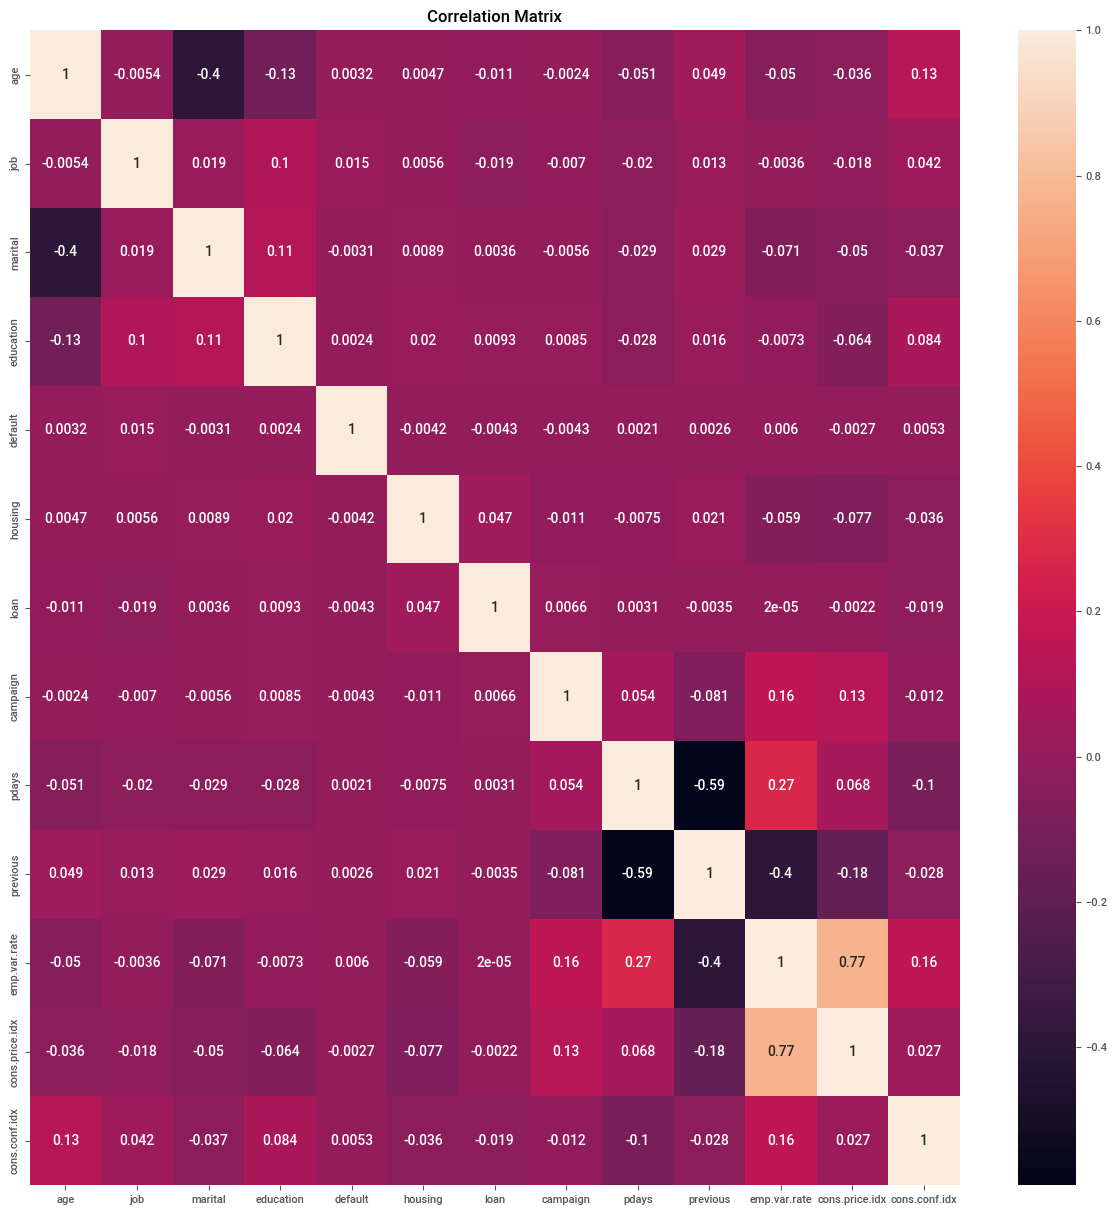

In [50]:
# Explore  correlation
#multi variate analysis
plt.figure(figsize=(15,15)) #To set canvas 
sns.heatmap(d.drop('subscription_yes',axis=1).corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

In [51]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               30488 non-null  int64  
 1   job               30488 non-null  int64  
 2   marital           30488 non-null  int64  
 3   education         30488 non-null  int64  
 4   default           30488 non-null  int64  
 5   housing           30488 non-null  int64  
 6   loan              30488 non-null  int64  
 7   campaign          30488 non-null  int64  
 8   pdays             30488 non-null  int64  
 9   previous          30488 non-null  int64  
 10  emp.var.rate      30488 non-null  float64
 11  cons.price.idx    30488 non-null  float64
 12  cons.conf.idx     30488 non-null  float64
 13  subscription_yes  30488 non-null  uint8  
dtypes: float64(3), int64(10), uint8(1)
memory usage: 3.3 MB


#### REMOVING DUPLICATE VALUES

In [52]:
d.duplicated()

0        False
2        False
3        False
4        False
6        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 30488, dtype: bool

In [53]:
duplicate = d[d.duplicated()]
print("Duplicate Rows :")
duplicate


Duplicate Rows :


,age,job,marital,education,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,subscription_yes
11,25,7,2,3,0,1,0,1,999,0,1.1,93.994,-36.4,0
16,35,1,1,1,0,1,0,1,999,0,1.1,93.994,-36.4,0
104,52,0,0,6,0,0,0,1,999,0,1.1,93.994,-36.4,0
220,35,0,1,3,0,1,0,2,999,0,1.1,93.994,-36.4,0
226,42,9,1,6,0,0,0,2,999,0,1.1,93.994,-36.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40806,35,9,1,5,0,1,0,1,999,2,-1.1,94.199,-37.5,0
40840,32,0,2,6,0,1,0,4,999,0,-1.1,94.199,-37.5,0
40852,34,0,1,6,0,0,1,3,999,0,-1.1,94.199,-37.5,1
41172,31,0,2,6,0,1,0,1,999,0,-1.1,94.767,-50.8,1


In [54]:
#checking sum of duplicated values 
## checking the duplicate rows
d.duplicated().sum()

4732

In [55]:
d.drop_duplicates(inplace=True)

In [56]:
## checking the constant features in numerical 
d.describe()
## the standard deviation of any feature is 0,
#that means we have constant feature,and we should remove.

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,subscription_yes
count,25756.000000,25756.000000,25756.000000,25756.000000,25756.000000,25756.000000,25756.000000,25756.000000,25756.000000,25756.000000,25756.000000,25756.000000,25756.000000,25756.000000
mean,39.499418,3.809986,1.178483,3.802842,0.000116,0.539059,0.175843,2.686520,948.570547,0.222395,-0.180490,93.511776,-40.704294,0.146956
std,10.659865,3.591184,0.633330,1.996938,0.010792,0.498482,0.380694,2.896164,218.028800,0.557685,1.636969,0.602002,4.888113,0.354069
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.000000
25%,32.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,999.000000,0.000000,-1.800000,92.963000,-42.700000,0.000000
50%,37.000000,3.000000,1.000000,3.000000,0.000000,1.000000,0.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,0.000000
75%,46.000000,7.000000,2.000000,6.000000,0.000000,1.000000,0.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,0.000000
max,95.000000,10.000000,2.000000,6.000000,1.000000,1.000000,1.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,1.000000


# MODEL CREATION

##### Steps for creating model
Step1 --Create X and y-->Independent and dependent variable
Step 2 -- Any feature transformation method based on 
type of algorithm used.
Step 3 -- Creating training and testing data.

In training data the applied algorithm will find the
coefficients and use this equation to predict inputs 
from testing data.
Finally we will compare actual testing and predicted
testing values and analyze the performance of model.

### SPLITTING THE DATA

In [57]:
## Defining X and y and creating dependent and independent variables

X = d.drop(columns = ['subscription_yes']) ## independent variable
y = d['subscription_yes'] ## Dependent or target variable or the variable which we have to predict

In [58]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()## object creation
X_scaled = scaler.fit_transform(X)# scaling independent variables

In [59]:
d

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,subscription_yes
0,56,3,1,0,0,0,0,1,999,0,1.1,93.994,-36.4,0
2,37,7,1,3,0,1,0,1,999,0,1.1,93.994,-36.4,0
3,40,0,1,1,0,0,0,1,999,0,1.1,93.994,-36.4,0
4,56,7,1,3,0,0,1,1,999,0,1.1,93.994,-36.4,0
6,59,0,1,5,0,0,0,1,999,0,1.1,93.994,-36.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,1,999,0,-1.1,94.767,-50.8,1
41184,46,1,1,5,0,0,0,1,999,0,-1.1,94.767,-50.8,0
41185,56,5,1,6,0,1,0,2,999,0,-1.1,94.767,-50.8,0
41186,44,9,1,5,0,0,0,1,999,0,-1.1,94.767,-50.8,1


In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [61]:
##Model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() #object creation of logistic regression
    
log_reg.fit(X_train,y_train) #training model with training data

LogisticRegression()

In [62]:
y_train_pre=log_reg.predict(X_train)# predicting y_train
y_train_pre

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [63]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [64]:
y_train_pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [65]:
y_pred = log_reg.predict(X_test) # testing model
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [66]:
y_train.shape # to know the shape of y_train (rows and columns)

(20604,)

In [67]:
y_pred.shape # to know the shape of y_train (rows and columns)

(5152,)

In [68]:
## calculating accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_train,y_train_pre)# model traning accuracy  
accuracy

0.8707532517957678

In [69]:
test_accuracy=accuracy_score(y_test,y_pred)
test_accuracy

0.8649068322981367

In [70]:
Precision = precision_score(y_test,y_pred)# the number of true positive divided by the total number of positive prediction
Precision

0.6854460093896714

In [71]:
# Recall on testing
Recall = recall_score(y_test,y_pred)# the total number of positive results how many positives were correctly predicted by the model.
Recall

0.18838709677419355

In [72]:
# F1 Score
F1_Score = f1_score(y_test,y_pred)# when precision and recall both are important
F1_Score

0.2955465587044534

In [73]:
# Area Under Curve
from sklearn.metrics import  roc_auc_score
auc = roc_auc_score(y_test, y_pred)
auc

0.5865399043386618

In [74]:
##confusion matrix
pd.crosstab(y_test, y_pred)

col_0,0,1
subscription_yes,,
0,4310,67
1,629,146


In [75]:
report=classification_report(y_test, y_pred)# it will give precision,recall,f1 scores and accuracy  
print(report)

              precision    recall  f1-score   support

           0       0.87      0.98      0.93      4377
           1       0.69      0.19      0.30       775

    accuracy                           0.86      5152
   macro avg       0.78      0.59      0.61      5152
weighted avg       0.84      0.86      0.83      5152



In [76]:
## Prediciting the probabilities of class 1
probs=log_reg.predict_proba(X_test)[:,1]

In [77]:
probs

array([0.0570492 , 0.04939355, 0.08956035, 0.07830283, 0.07290982,
       0.02708221, 0.08871178, 0.04546615, 0.37515527, 0.04493227,
       0.03877397, 0.06771213, 0.06825971, 0.04653587, 0.10393447,
       0.08765153, 0.09712029, 0.03230859, 0.05187532, 0.1654306 ,
       0.17432168, 0.03704657, 0.0737632 , 0.1176075 , 0.27265499,
       0.12527282, 0.11458248, 0.18119141, 0.10698737, 0.13938748,
       0.07036338, 0.09034285, 0.11243268, 0.02723933, 0.0567281 ,
       0.08500833, 0.07975902, 0.10379906, 0.05610238, 0.07430672,
       0.03872963, 0.1026553 , 0.04181794, 0.04560419, 0.43419164,
       0.08449922, 0.06744892, 0.18236844, 0.33659854, 0.09509368,
       0.04607835, 0.04603439, 0.20038295, 0.74010188, 0.07405931,
       0.05169555, 0.14464359, 0.04803245, 0.05971387, 0.11202173,
       0.06061363, 0.23219443, 0.21038833, 0.09171872, 0.06594971,
       0.03911145, 0.07014501, 0.24863241, 0.08871381, 0.14448554,
       0.03868426, 0.7411696 , 0.03882551, 0.03711673, 0.20084

In [78]:
## Defining the threshold limit
def predict_threshold (model,X_test,thresholds):
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0)#checking where probability of class 1 is  greater than threshold

In [79]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.1):# it will create matrix /array from range 0 to 1 with step 0.1
    y_predict = predict_threshold(log_reg,X_test,thr)# it will check result  for  each threshold from 0 to 0.1
    print("Threshold :",thr)#printing threshold
    print(confusion_matrix(y_test,y_pred))# confusion matrix for each prediction

Threshold : 0.0
[[4310   67]
 [ 629  146]]
Threshold : 0.1
[[4310   67]
 [ 629  146]]
Threshold : 0.2
[[4310   67]
 [ 629  146]]
Threshold : 0.30000000000000004
[[4310   67]
 [ 629  146]]
Threshold : 0.4
[[4310   67]
 [ 629  146]]
Threshold : 0.5
[[4310   67]
 [ 629  146]]
Threshold : 0.6000000000000001
[[4310   67]
 [ 629  146]]
Threshold : 0.7000000000000001
[[4310   67]
 [ 629  146]]
Threshold : 0.8
[[4310   67]
 [ 629  146]]
Threshold : 0.9
[[4310   67]
 [ 629  146]]


In [80]:
## visualizing the roc plot
def plot_roc_curve(fpr, tpr):# function to plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')#line plot between fpr and tpr
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')# assigning name to  x axis
    plt.ylabel('True Positive Rate')# assigning name to y axis
    plt.title('Receiver Operating Characteristic (ROC) Curve')#assigning name to curve  
    plt.legend()#area describing the elements of the
    plt.show()

In [81]:
from sklearn.metrics import roc_auc_score,roc_curve ## used to compare multiple models
auc = roc_auc_score(y_test, probs) #roc curve 
print('AUC: %.2f' % auc)

AUC: 0.76


In [82]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
# it will return 
#Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].
#Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].
#Decreasing thresholds on the decision function used to compute fpr and tpr

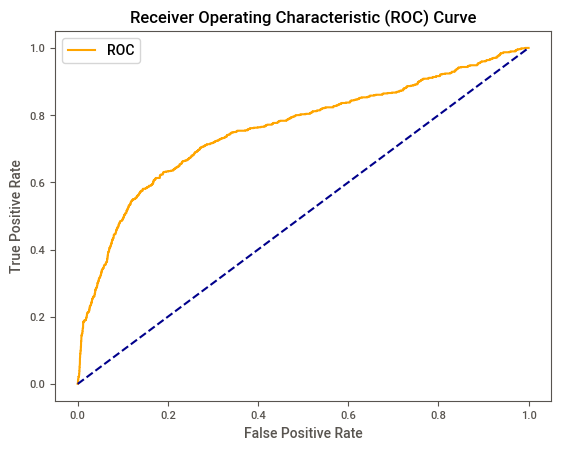

In [83]:
import matplotlib.pyplot as plt
plot_roc_curve(fpr, tpr)#plotting ruc curve

import warnings
warnings.filterwarnings('ignore')


